# <b>1 <span style='color:#0000FF'>|</span> Introduction</b>


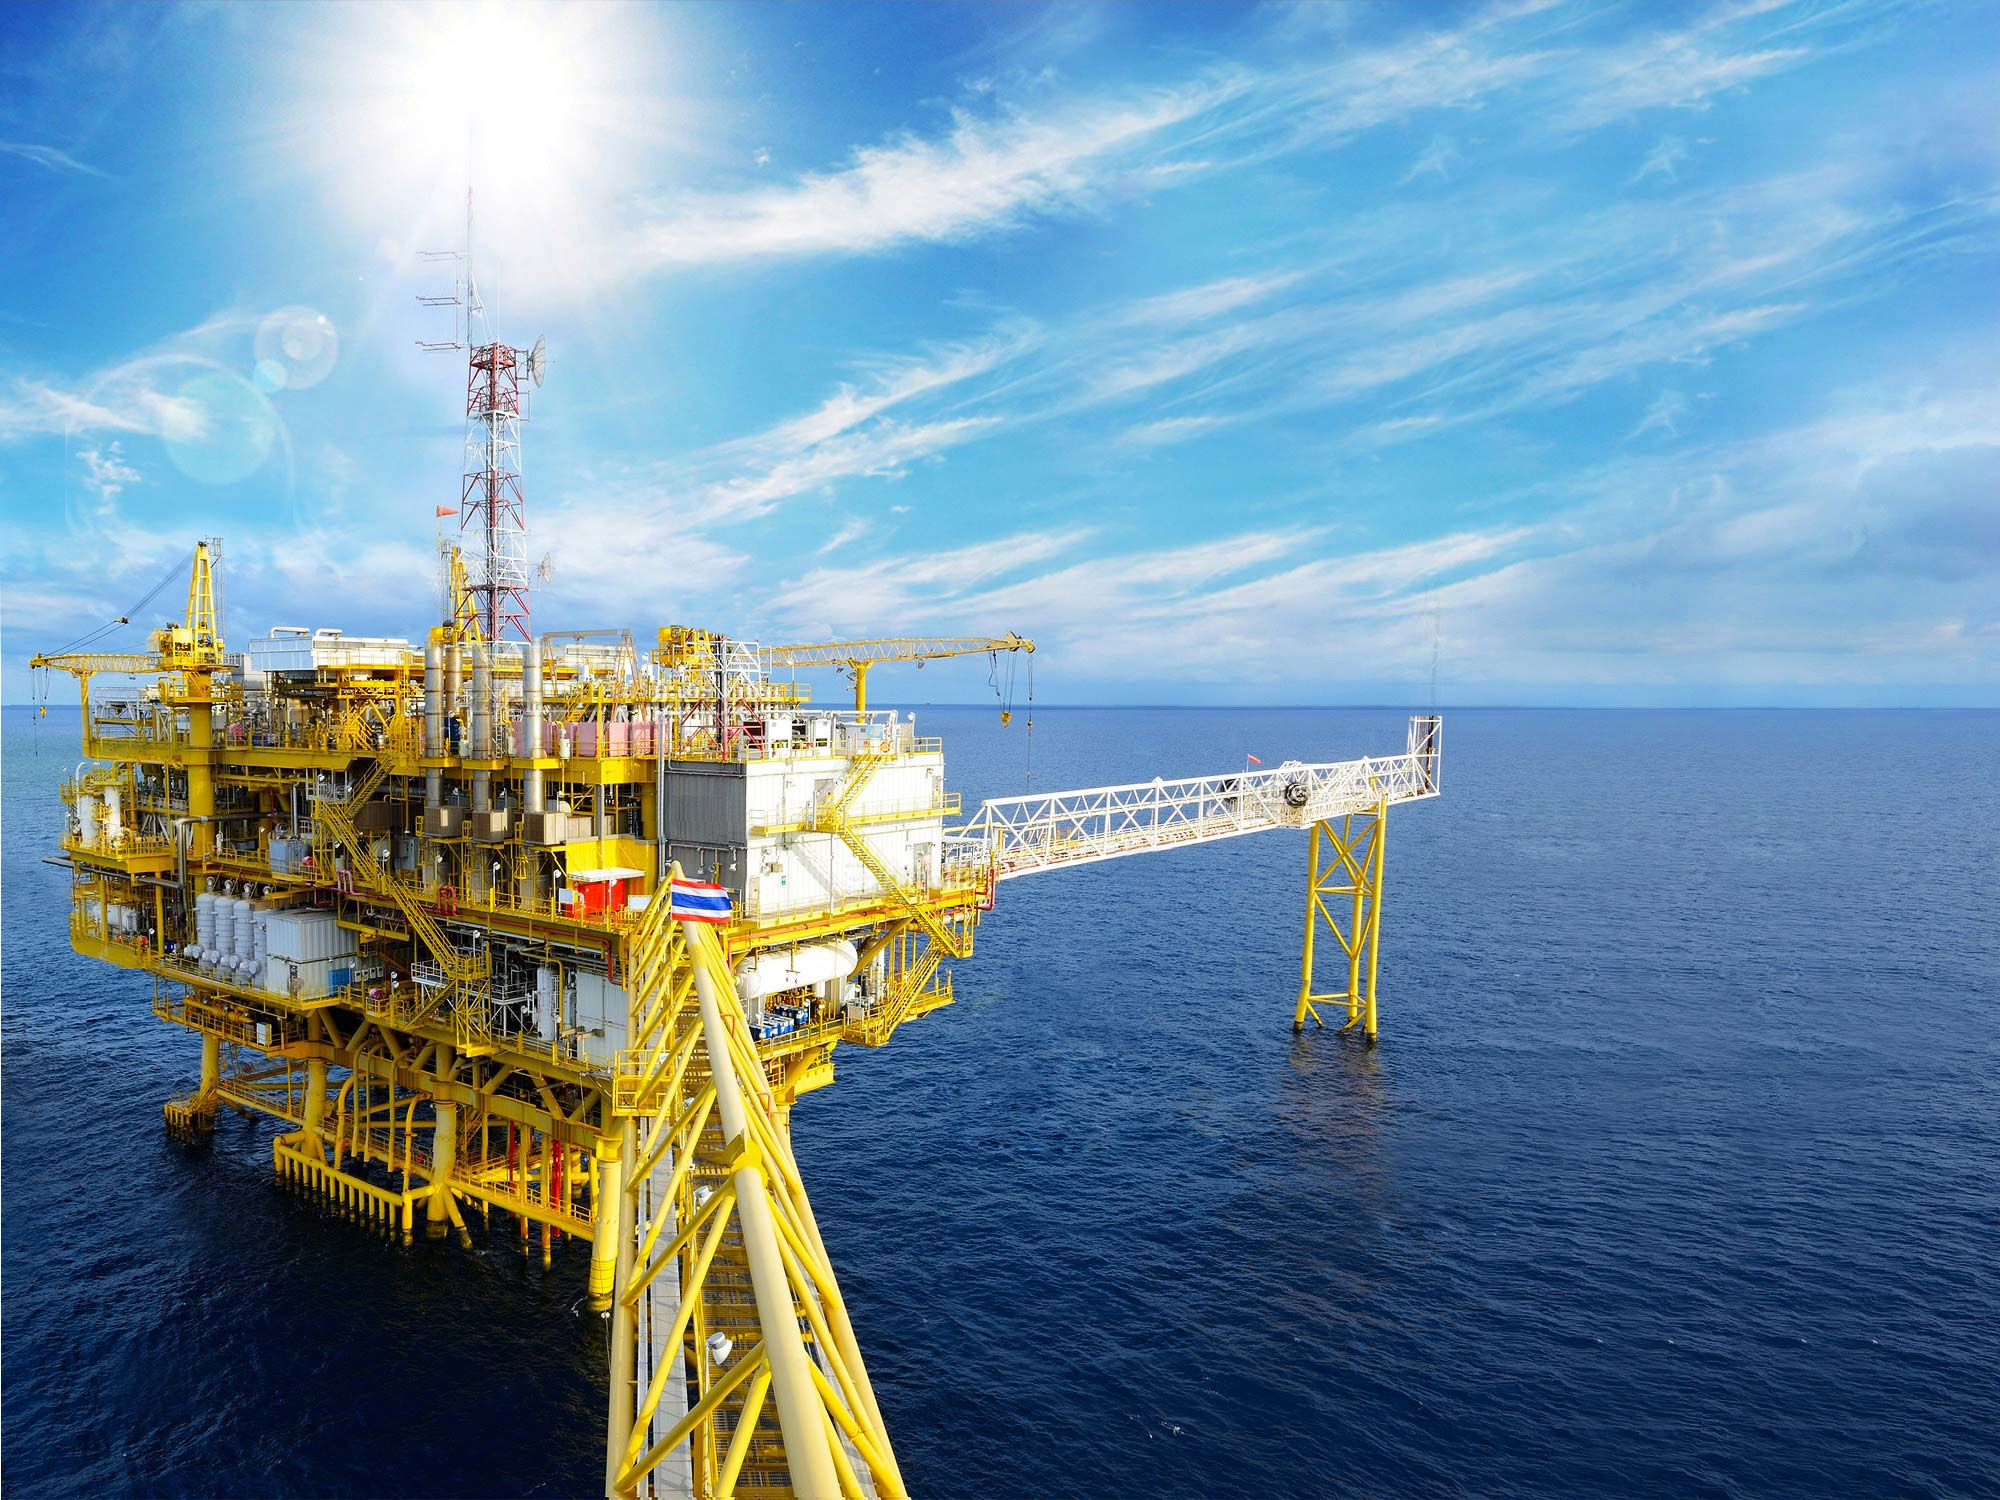

Variable|Description
------- | ---------
Depth (m)| 
ROP Avg(m/hr) |
Surface WOB Avg(klb) |
RPM Surface Avg (rpm) |	
Torque Abs Avg (f-b)|
SPP Avg (psig)	|
Flow in Pum Avg(gpm)|	
M.wt(ppg)|
HOB(hr)|
Rev On Bit (krev)|	
Bit Diameter|	
TFA(in2)|
pit volume(bbl)	|
PP(ppg)|
OVB(ppg) |

# <b>2 <span style='color:#0000FF'>|</span> Importing libraries</b>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno      ## for missing values
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from datasist.structdata import detect_outliers

# data modeling 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
import joblib


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 6]}, font_scale=1.3)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


# <b>3 <span style='color:#0000FF'>|</span> Reading the dataset</b>

In [2]:
def read_data(path) :
    df = pd.read_csv(path,parse_dates=True)
    return df

In [3]:
well_Data= read_data('Data\Db4.csv')
well_Data.head()

Depth (m)  ROP Avg(m/hr)  Surface WOB Avg(klb)  RPM Surface Avg (rpm)  \
0     1207.0            7.4                   3.8                    112   
1     1207.5            8.4                   6.0                     66   
2     1208.0           12.7                   6.2                     55   
3     1208.5           12.9                   5.6                     55   
4     1209.0           13.0                   5.6                     55   

   Torque Abs Avg (f-b)  SPP Avg (psig)  Flow in Pum Avg(gpm)  M.wt(ppg)  \
0                1890.4            2914                  1079       10.2   
1                2251.9            2422                   940       10.2   
2                2287.5            2312                   909       10.2   
3                2228.6            2310                   909       10.2   
4                2172.0            2309                   909       10.2   

     HOB(hr)  Rev On Bit (krev)  Bit Diameter  TFA(in2)  pit volume(bbl)  \
0  33.050000              240.2          17.5    1.1688           396.82   
1   8.900000               53.3          17.5    1.1688           665.03   
2   3.550000               11.7          17.5    1.1688           723.56   
3   3.583333               11.8          17.5    1.1688           712.45   
4   3.616667               12.0          17.5    1.1688           692.46   

   PP(ppg)  OVB(ppg)  
0     9.18     12.51  
1     9.18     12.51  
2     9.18     12.51  
3     9.18     12.51  
4     9.18     12.51

In [4]:
well_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Depth (m)              1771 non-null   float64
 1   ROP Avg(m/hr)          1771 non-null   float64
 2   Surface WOB Avg(klb)   1771 non-null   float64
 3   RPM Surface Avg (rpm)  1771 non-null   int64  
 4   Torque Abs Avg (f-b)   1771 non-null   float64
 5   SPP Avg (psig)         1771 non-null   int64  
 6   Flow in Pum Avg(gpm)   1771 non-null   int64  
 7   M.wt(ppg)              1771 non-null   float64
 8   HOB(hr)                1771 non-null   float64
 9   Rev On Bit (krev)      1771 non-null   float64
 10  Bit Diameter           1771 non-null   float64
 11  TFA(in2)               1771 non-null   float64
 12  pit volume(bbl)        1771 non-null   float64
 13  PP(ppg)                1771 non-null   float64
 14  OVB(ppg)               1771 non-null   float64
dtypes: f

<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">Takeaway <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Points </strong></p>


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
Number of variables = 15<br>
Number of rows = 1771<br>
Number of categorical type of feature = 0<br>
Number of numerical type of feature = 15<br>
<br></p>

In [5]:
well_Data.describe().T.style.set_properties(**{'background-color': '#FFFF99','color': 'black','border-color': 'white'})

In [6]:
well_Data.isnull().sum()

Depth (m)                0
ROP Avg(m/hr)            0
Surface WOB Avg(klb)     0
RPM Surface Avg (rpm)    0
Torque Abs Avg (f-b)     0
SPP Avg (psig)           0
Flow in Pum Avg(gpm)     0
M.wt(ppg)                0
HOB(hr)                  0
Rev On Bit (krev)        0
Bit Diameter             0
TFA(in2)                 0
pit volume(bbl)          0
PP(ppg)                  0
OVB(ppg)                 0
dtype: int64

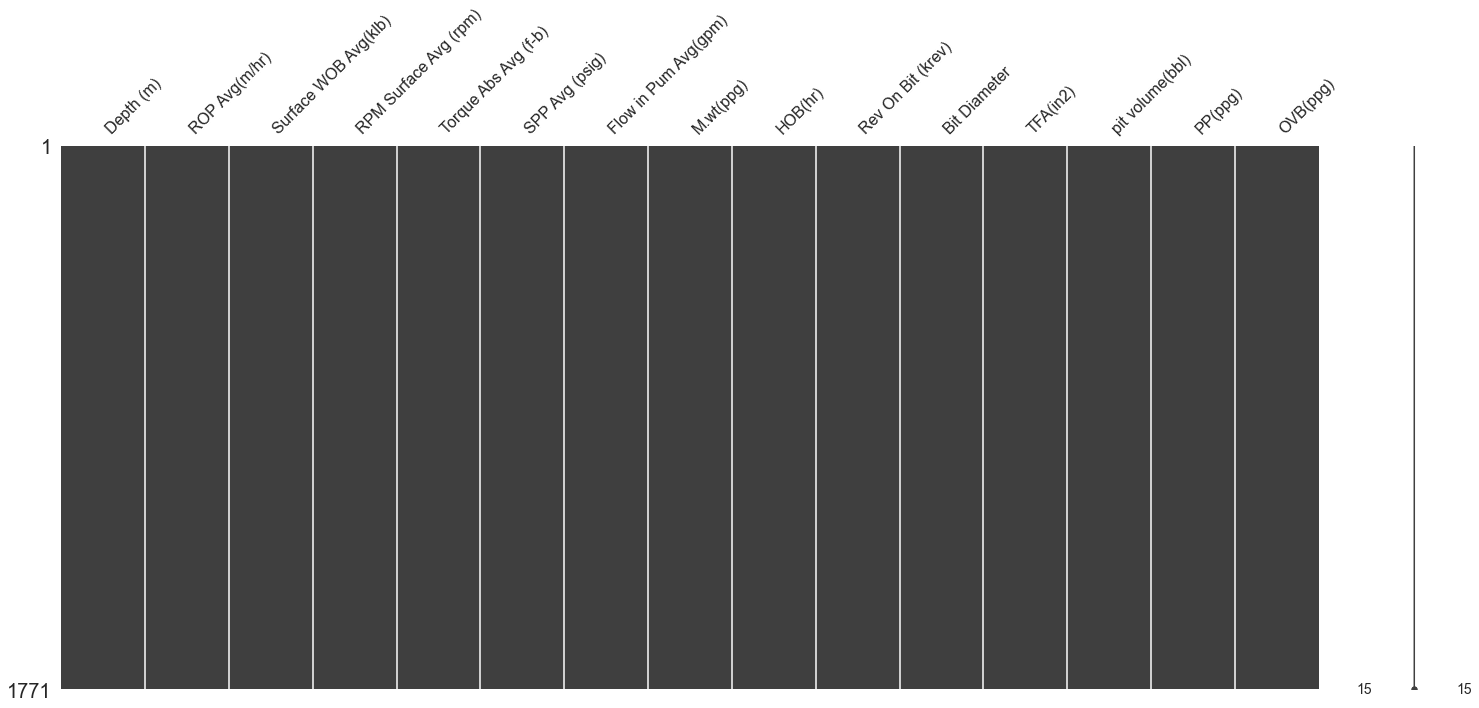

In [6]:
msno.matrix(well_Data)
plt.show()

In [7]:
well_Data.duplicated().sum()

0

# <b>4<span style='color:#0000FF'>|</span> Pandas Profiling </b>

### <span style="color: blue;">Generates profile reports from a pandas DataFrame.</span>
 - **for more information about pandas profile report check this** 
 **[Github | pandas profiling](https://github.com/ydataai/pandas-profiling)**

In [8]:
profile=ProfileReport(well_Data, minimal=True,explorative=True)
profile.to_file('Well analysis.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# <b>5 <span style='color:#0000FF'>|</span> Exploratory Data Analysis</b>

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.1 | Target Feature [Price] </b></p>
</div>. 

In [9]:
well_Data.columns

Index(['Depth (m)', 'ROP Avg(m/hr)', 'Surface WOB Avg(klb)',
       'RPM Surface Avg (rpm)', 'Torque Abs Avg (f-b)', 'SPP Avg (psig)',
       'Flow in Pum Avg(gpm)', 'M.wt(ppg)', 'HOB(hr)', 'Rev On Bit (krev)',
       'Bit Diameter', 'TFA(in2)', 'pit volume(bbl)', 'PP(ppg)', 'OVB(ppg)'],
      dtype='object')

In [10]:
well_Data[['ROP Avg(m/hr)']].describe()

ROP Avg(m/hr)
count    1771.000000
mean       12.349181
std         3.605245
min         3.700000
25%         9.700000
50%        11.600000
75%        14.400000
max        25.300000

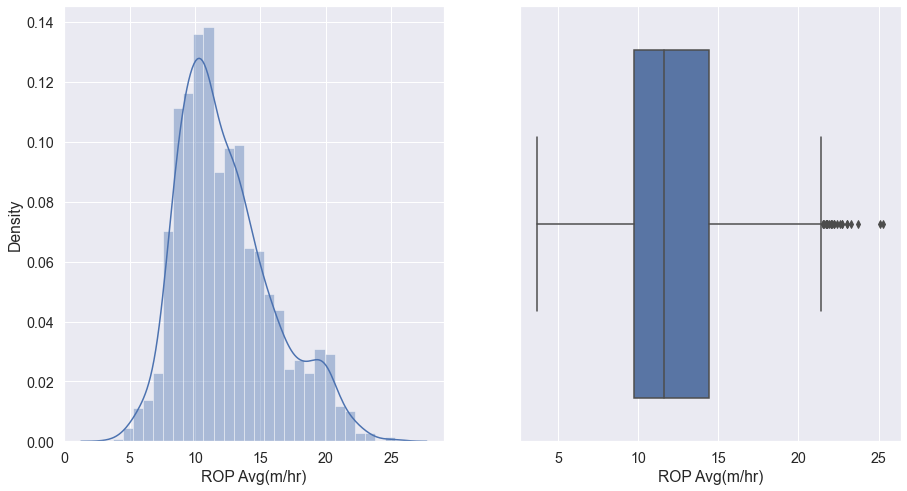

In [11]:
fig , ax = plt.subplots(1,2,figsize=(15,8))
sns.distplot(well_Data['ROP Avg(m/hr)'],ax=ax[0])
sns.boxplot(data=well_Data,x='ROP Avg(m/hr)',ax=ax[1])
plt.show()

In [12]:
top_highest_ROP = well_Data.sort_values("ROP Avg(m/hr)", ascending = False).reset_index().head(10)
top_highest_ROP

index  Depth (m)  ROP Avg(m/hr)  Surface WOB Avg(klb)  \
0   1310     1862.0           25.3                  11.9   
1   1309     1861.5           25.1                   9.6   
2    101     1257.5           23.7                   5.7   
3    102     1258.0           23.3                   5.2   
4   1181     1797.5           23.0                   7.9   
5   1182     1798.0           23.0                   7.6   
6   1180     1797.0           22.7                   7.9   
7   1183     1798.5           22.7                   7.1   
8    103     1258.5           22.6                   4.8   
9   1209     1811.5           22.4                  14.2   

   RPM Surface Avg (rpm)  Torque Abs Avg (f-b)  SPP Avg (psig)  \
0                    119                2970.4            3243   
1                    119                2930.7            3218   
2                    119                2605.8            2457   
3                    119                2518.9            2464   
4                    119                2936.8            3023   
5                    119                2896.8            3034   
6                    119                2953.3            3025   
7                    119                2888.4            3054   
8                    119                2450.6            2472   
9                    119                3441.2            3083   

   Flow in Pum Avg(gpm)  M.wt(ppg)    HOB(hr)  Rev On Bit (krev)  \
0                   909       10.6  15.333333               97.1   
1                   909       10.6  15.316667               96.9   
2                  1025       10.3   4.300000               20.5   
3                  1025       10.3   4.316667               20.7   
4                   917       10.6  11.250000               67.9   
5                   917       10.6  11.266667               68.0   
6                   917       10.6  11.233333               67.7   
7                   917       10.6  11.283333               68.2   
8                  1026       10.3   4.350000               20.8   
9                   916       10.6  11.916667               72.7   

   Bit Diameter  TFA(in2)  pit volume(bbl)  PP(ppg)  OVB(ppg)  
0         12.25    0.9940           705.49   10.180    15.400  
1         12.25    0.9940           708.54   10.175    15.395  
2         17.50    1.1688           696.70    9.170    12.765  
3         17.50    1.1688           696.31    9.160    12.770  
4         12.25    0.9940           768.30   10.025    15.160  
5         12.25    0.9940           767.63   10.050    15.160  
6         12.25    0.9940           768.74   10.000    15.160  
7         12.25    0.9940           767.45   10.125    15.165  
8         17.50    1.1688           693.50    9.170    12.770  
9         12.25    0.9940           763.10   10.070    15.215

In [13]:
lowest_ROP = well_Data.sort_values("ROP Avg(m/hr)", ascending = True).reset_index().head(10)
lowest_ROP

index  Depth (m)  ROP Avg(m/hr)  Surface WOB Avg(klb)  \
0   1762     2088.0            3.7                  14.0   
1    291     1352.5            4.7                   6.3   
2   1761     2087.5            4.7                  21.2   
3    596     1505.0            4.9                   2.6   
4    903     1658.5            4.9                   3.8   
5    910     1662.0            5.0                  10.1   
6    377     1395.5            5.1                   5.3   
7   1669     2041.5            5.3                   5.1   
8    748     1581.0            5.3                   7.0   
9   1726     2070.0            5.3                  26.9   

   RPM Surface Avg (rpm)  Torque Abs Avg (f-b)  SPP Avg (psig)  \
0                    120                3927.1            2911   
1                    119                2007.8            2410   
2                    120                4728.9            2906   
3                    119                2331.1            2845   
4                     50                2136.7            1960   
5                     49                2326.9            2937   
6                    120                2004.5            2663   
7                     98                2007.3            3095   
8                    119                2929.5            3068   
9                    120                4599.2            2973   

   Flow in Pum Avg(gpm)  M.wt(ppg)    HOB(hr)  Rev On Bit (krev)  \
0                   888      10.50  34.766667              235.7   
1                  1016      10.30  13.600000               87.4   
2                   888      10.50  34.616667              234.6   
3                  1015      10.50  29.883333              204.0   
4                   715      10.60   0.416667                1.3   
5                   924      10.60   0.933333                2.8   
6                  1006      10.40  18.133333              120.0   
7                   886      10.69  29.516667              198.2   
8                  1004      10.50  37.200000              256.2   
9                   905      10.50  32.566667              219.8   

   Bit Diameter  TFA(in2)  pit volume(bbl)  PP(ppg)  OVB(ppg)  
0         12.25    0.9940           714.75    9.330    16.040  
1         17.50    1.1688           672.15    9.360    13.265  
2         12.25    0.9940           715.54    9.330    16.040  
3         17.50    1.1688           658.09    9.970    13.980  
4         12.25    0.9940           681.93   10.125    14.625  
5         12.25    0.9940           681.36   10.130    14.640  
6         17.50    1.1688           668.60    9.555    13.480  
7         12.25    0.9940           727.83    9.650    15.940  
8         17.50    1.1688           690.66    9.590    14.310  
9         12.25    0.9940           716.55    9.460    15.990

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.2 | Numerical Features </b></p>
</div>. 


In [14]:
def Num_feature_analysis(col):
    # describe data
    print(well_Data[[col]].describe())
    
    # ploting
    fig , ax = plt.subplots(1,2,figsize=(8,8))
    sns.distplot(well_Data[col],bins=30,kde=True,ax=ax[0])
    sns.boxplot(data=well_Data, x=col,ax=ax[1])
    sns.stripplot(well_Data[col],palette='summer',ax=ax[1])
    sns.jointplot(data=well_Data,x=col,y='ROP Avg(m/hr)',kind='scatter',palette='vridis')
    plt.show()

## <b><span style='color:blue'></span> `Depth (m)` </b>

        Depth (m)
count  1771.00000
mean   1649.50000
std     255.69399
min    1207.00000
25%    1428.25000
50%    1649.50000
75%    1870.75000
max    2092.00000


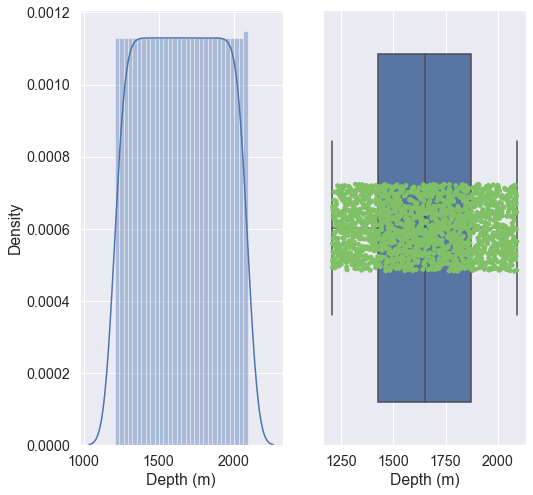

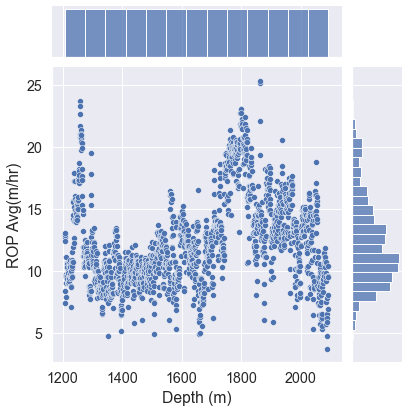

In [15]:
Num_feature_analysis('Depth (m)')

## <b><span style='color:blue'></span> `Surface WOB Avg(klb)` </b>

       Surface WOB Avg(klb)
count           1771.000000
mean               8.450423
std                4.881718
min                0.600000
25%                5.000000
50%                7.600000
75%               10.800000
max               32.800000


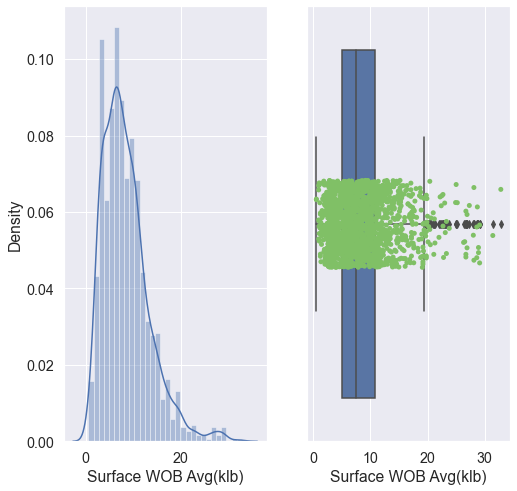

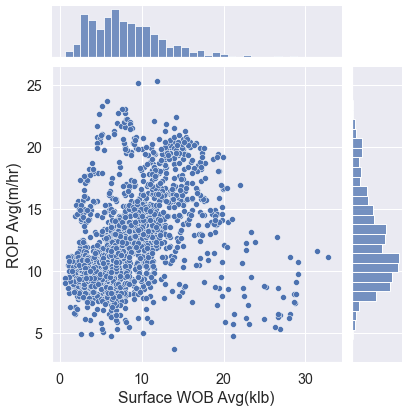

In [16]:
Num_feature_analysis('Surface WOB Avg(klb)')

## <b><span style='color:#0000FF'></span> `RPM Surface Avg (rpm)` </b>

       RPM Surface Avg (rpm)
count            1771.000000
mean              115.275551
std                14.511237
min                49.000000
25%               118.000000
50%               119.000000
75%               120.000000
max               121.000000


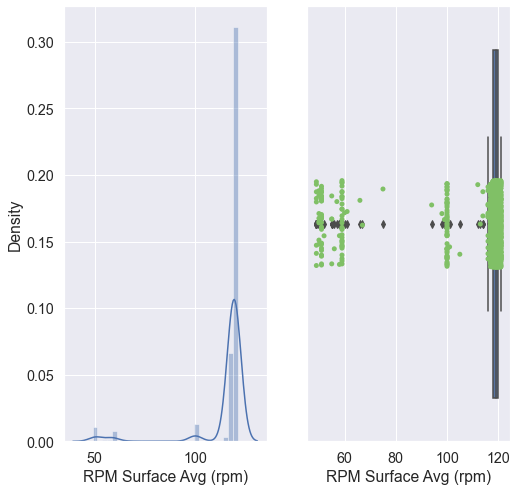

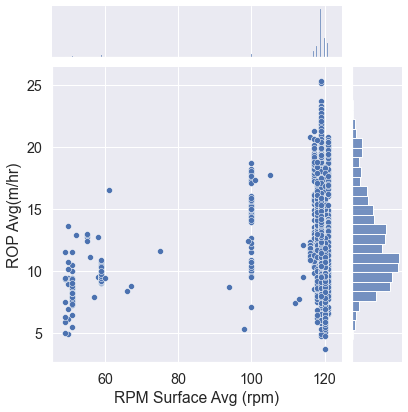

In [17]:
Num_feature_analysis('RPM Surface Avg (rpm)')

## <b><span style='color:#0000FF'></span> `Torque Abs Avg (f-b)` </b>

       Torque Abs Avg (f-b)
count           1771.000000
mean            2666.471146
std              484.328716
min             1749.700000
25%             2318.650000
50%             2623.000000
75%             2933.250000
max             4948.700000


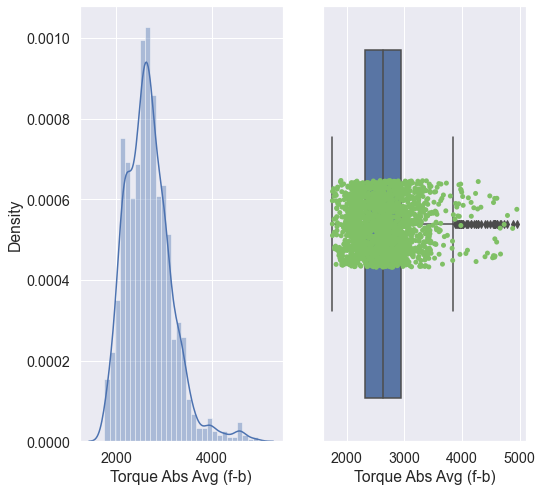

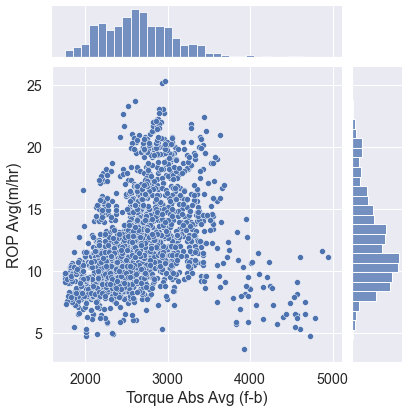

In [18]:
Num_feature_analysis('Torque Abs Avg (f-b)')

## <b><span style='color:#0000FF'></span> `SPP Avg (psig)` </b>

       SPP Avg (psig)
count     1771.000000
mean      2908.086957
std        291.670178
min       1645.000000
25%       2757.500000
50%       2952.000000
75%       3100.000000
max       3429.000000


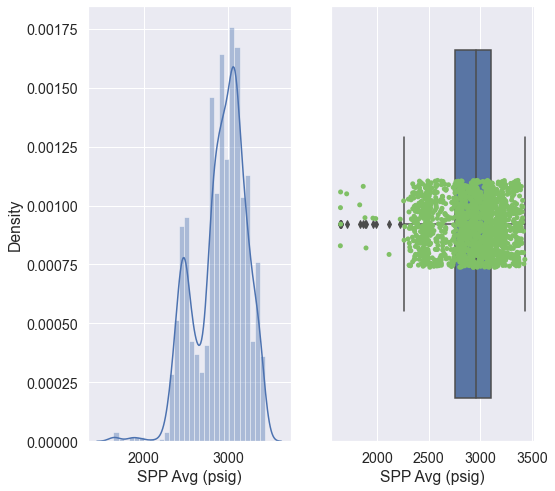

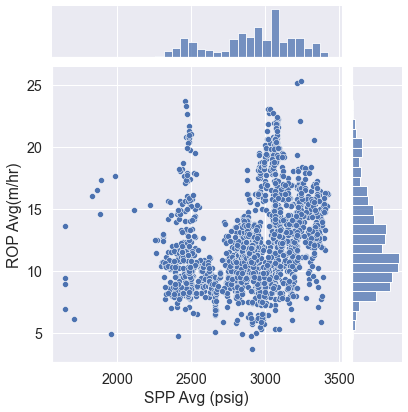

In [19]:
Num_feature_analysis('SPP Avg (psig)')

## <b><span style='color:#0000FF'></span> `Flow in Pum Avg(gpm)` </b>

       Flow in Pum Avg(gpm)
count           1771.000000
mean             960.776962
std               60.732026
min              508.000000
25%              913.000000
50%              940.000000
75%             1015.000000
max             1079.000000


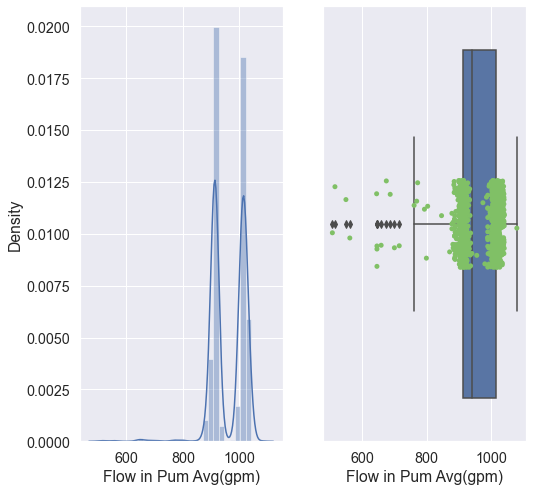

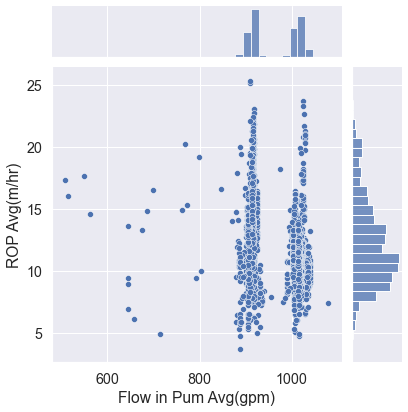

In [20]:
Num_feature_analysis('Flow in Pum Avg(gpm)')

## <b><span style='color:#0000FF'></span> `M.wt(ppg)` </b>

         M.wt(ppg)
count  1771.000000
mean     10.504009
std       0.129248
min      10.200000
25%      10.500000
50%      10.500000
75%      10.600000
max      10.720000


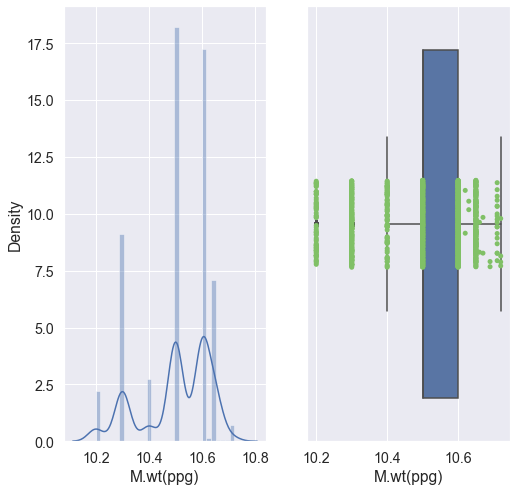

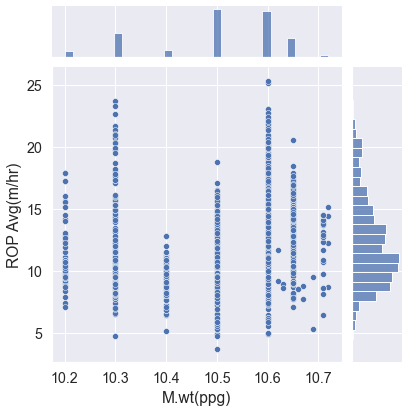

In [21]:
Num_feature_analysis('M.wt(ppg)')

## <b><span style='color:#0000FF'></span> `HOB(hr)` </b>

           HOB(hr)
count  1771.000000
mean     19.468822
std      11.607266
min       0.050000
25%       9.625000
50%      18.650000
75%      28.616667
max      43.850000


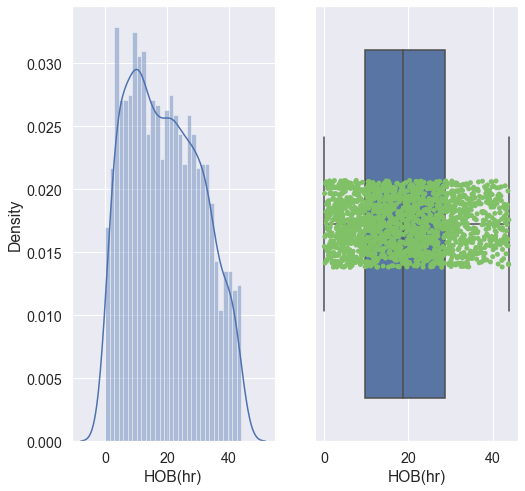

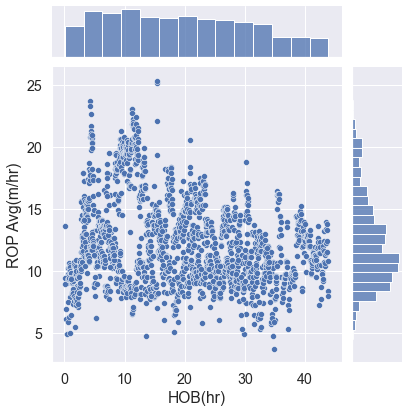

In [22]:
Num_feature_analysis('HOB(hr)')

## <b><span style='color:#0000FF'></span> `Rev On Bit (krev)` </b>

       Rev On Bit (krev)
count        1771.000000
mean          128.273970
std            82.941607
min             0.100000
25%            57.000000
50%           122.100000
75%           193.400000
max           304.000000


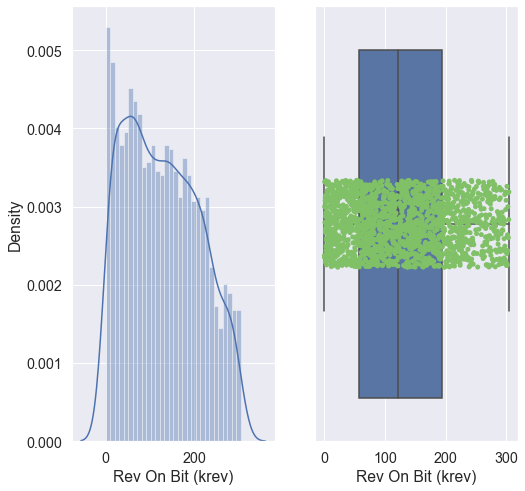

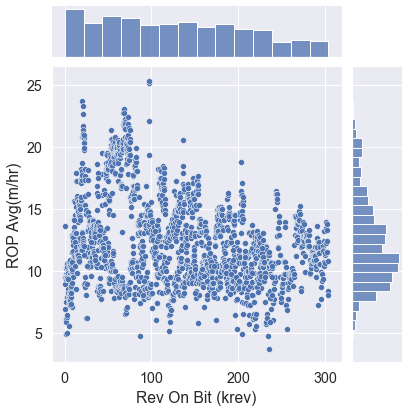

In [23]:
Num_feature_analysis('Rev On Bit (krev)')

## <b><span style='color:#0000FF'></span> `Bit Diameter` </b>

In [24]:
well_Data['Bit Diameter'].value_counts()

17.50    897
12.25    874
Name: Bit Diameter, dtype: int64

       Bit Diameter
count   1771.000000
mean      14.909091
std        2.625520
min       12.250000
25%       12.250000
50%       17.500000
75%       17.500000
max       17.500000


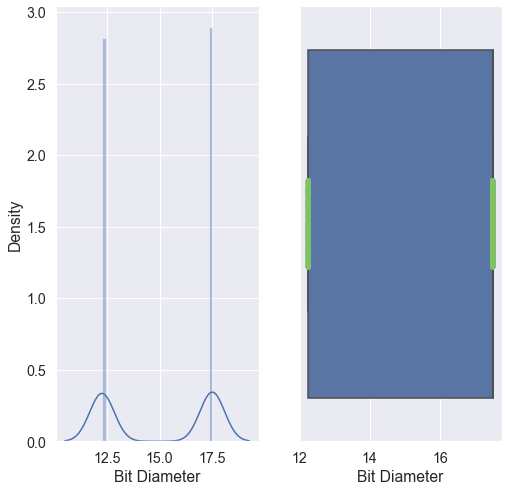

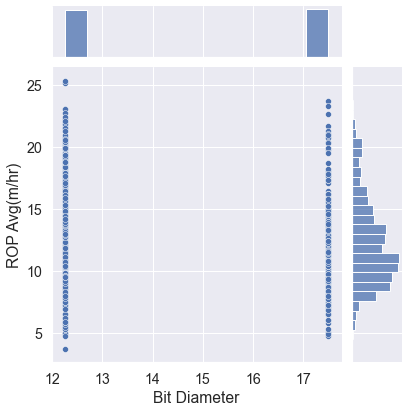

In [25]:
Num_feature_analysis('Bit Diameter')

## <b><span style='color:#0000FF'></span> `TFA(in2)` </b>

In [26]:
well_Data['TFA(in2)'].value_counts()

1.1688    897
0.9940    874
Name: TFA(in2), dtype: int64

          TFA(in2)
count  1771.000000
mean      1.082535
std       0.087417
min       0.994000
25%       0.994000
50%       1.168800
75%       1.168800
max       1.168800


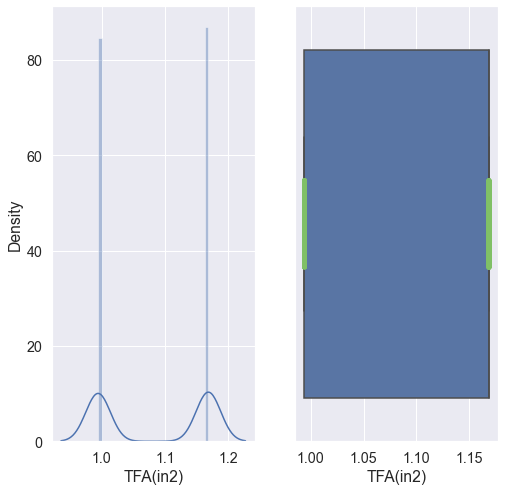

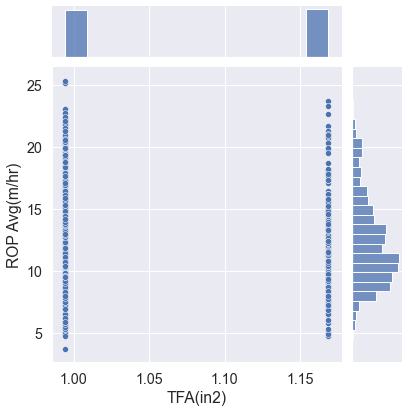

In [27]:
Num_feature_analysis('TFA(in2)')

## <b><span style='color:#0000FF'></span> `pit volume(bbl)` </b>

       pit volume(bbl)
count      1771.000000
mean        698.693461
std          38.501511
min         396.820000
25%         672.395000
50%         695.850000
75%         726.755000
max         785.260000


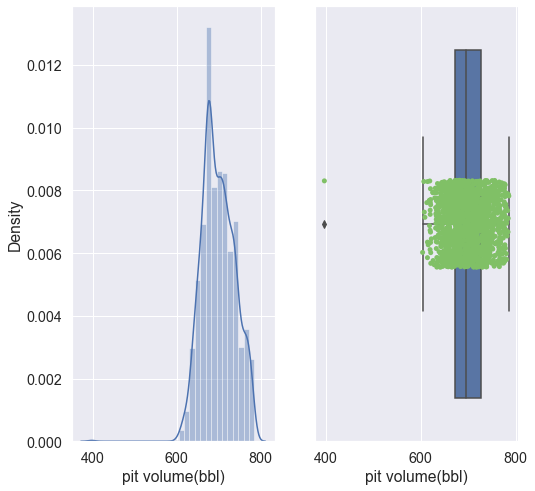

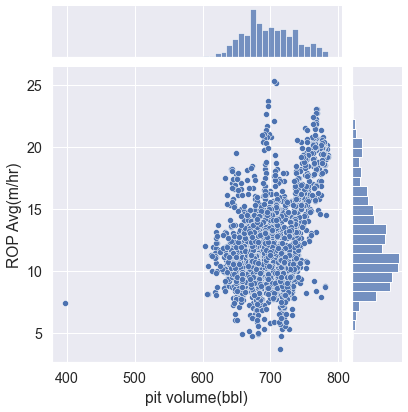

In [28]:
Num_feature_analysis('pit volume(bbl)')

## <b><span style='color:#0000FF'></span> `PP(ppg)` </b>

           PP(ppg)
count  1771.000000
mean      9.728619
std       0.363075
min       8.850000
25%       9.440000
50%       9.810000
75%      10.030000
max      10.320000


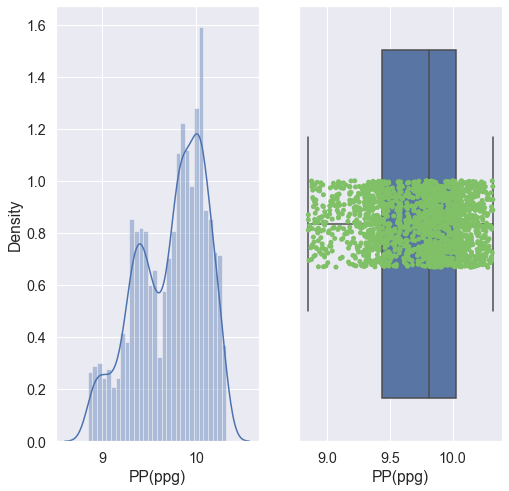

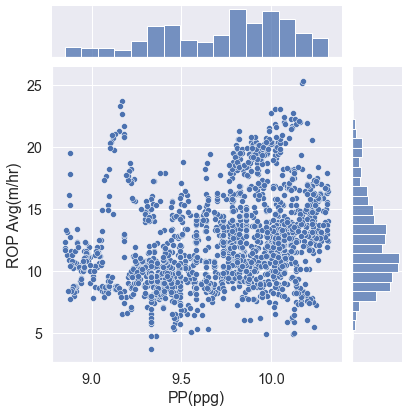

In [29]:
Num_feature_analysis('PP(ppg)')

## <b><span style='color:#0000FF'></span> `OVB(ppg)` </b>

          OVB(ppg)
count  1771.000000
mean     14.496909
std       1.040021
min      12.510000
25%      13.640000
50%      14.590000
75%      15.427500
max      16.040000


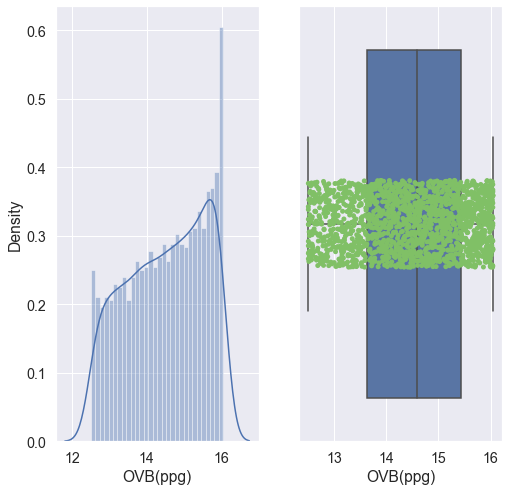

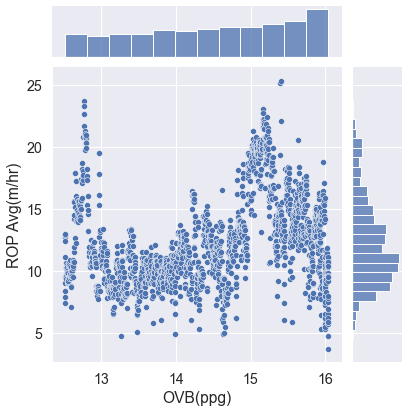

In [30]:
Num_feature_analysis('OVB(ppg)')

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> Correlation Matrix   </b></p>
</div>

In [31]:
''' Function to plot correlation of features '''
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(20,10))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='viridis',square=False,lw=2,annot=True,cbar=False,fmt='.1');plt.show() 

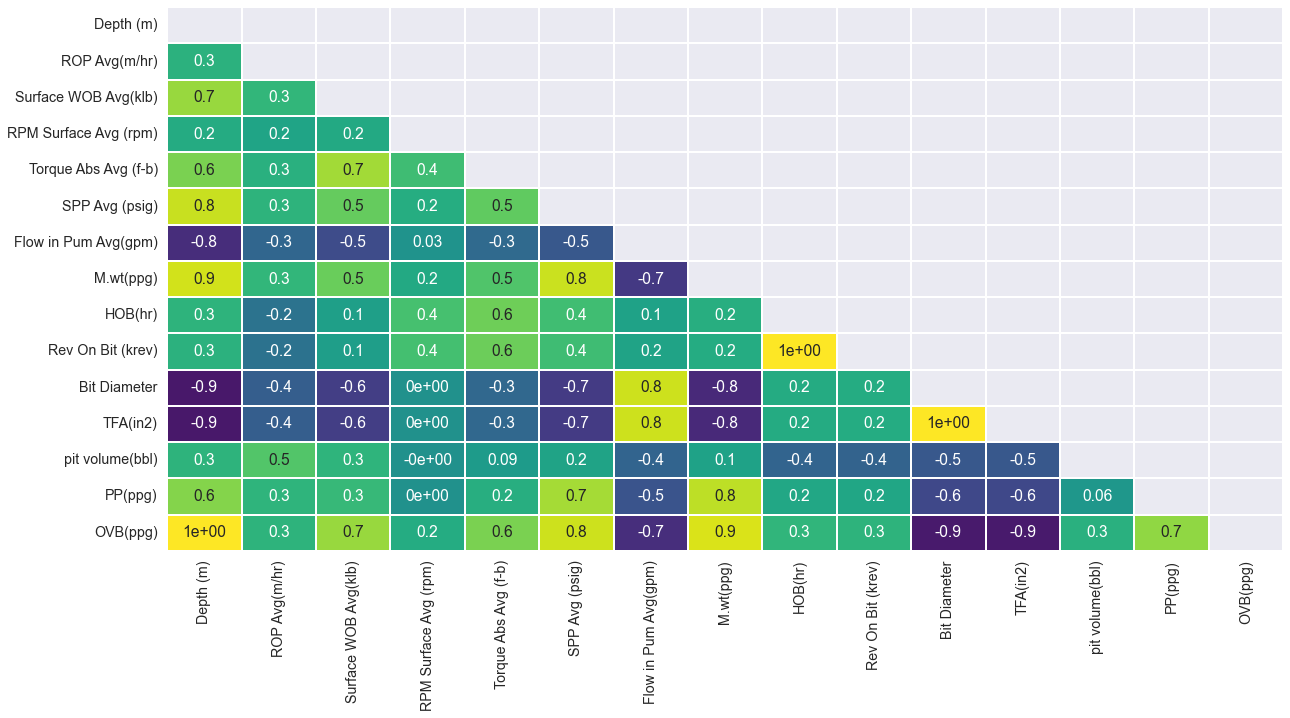

In [32]:
corrMat(well_Data)

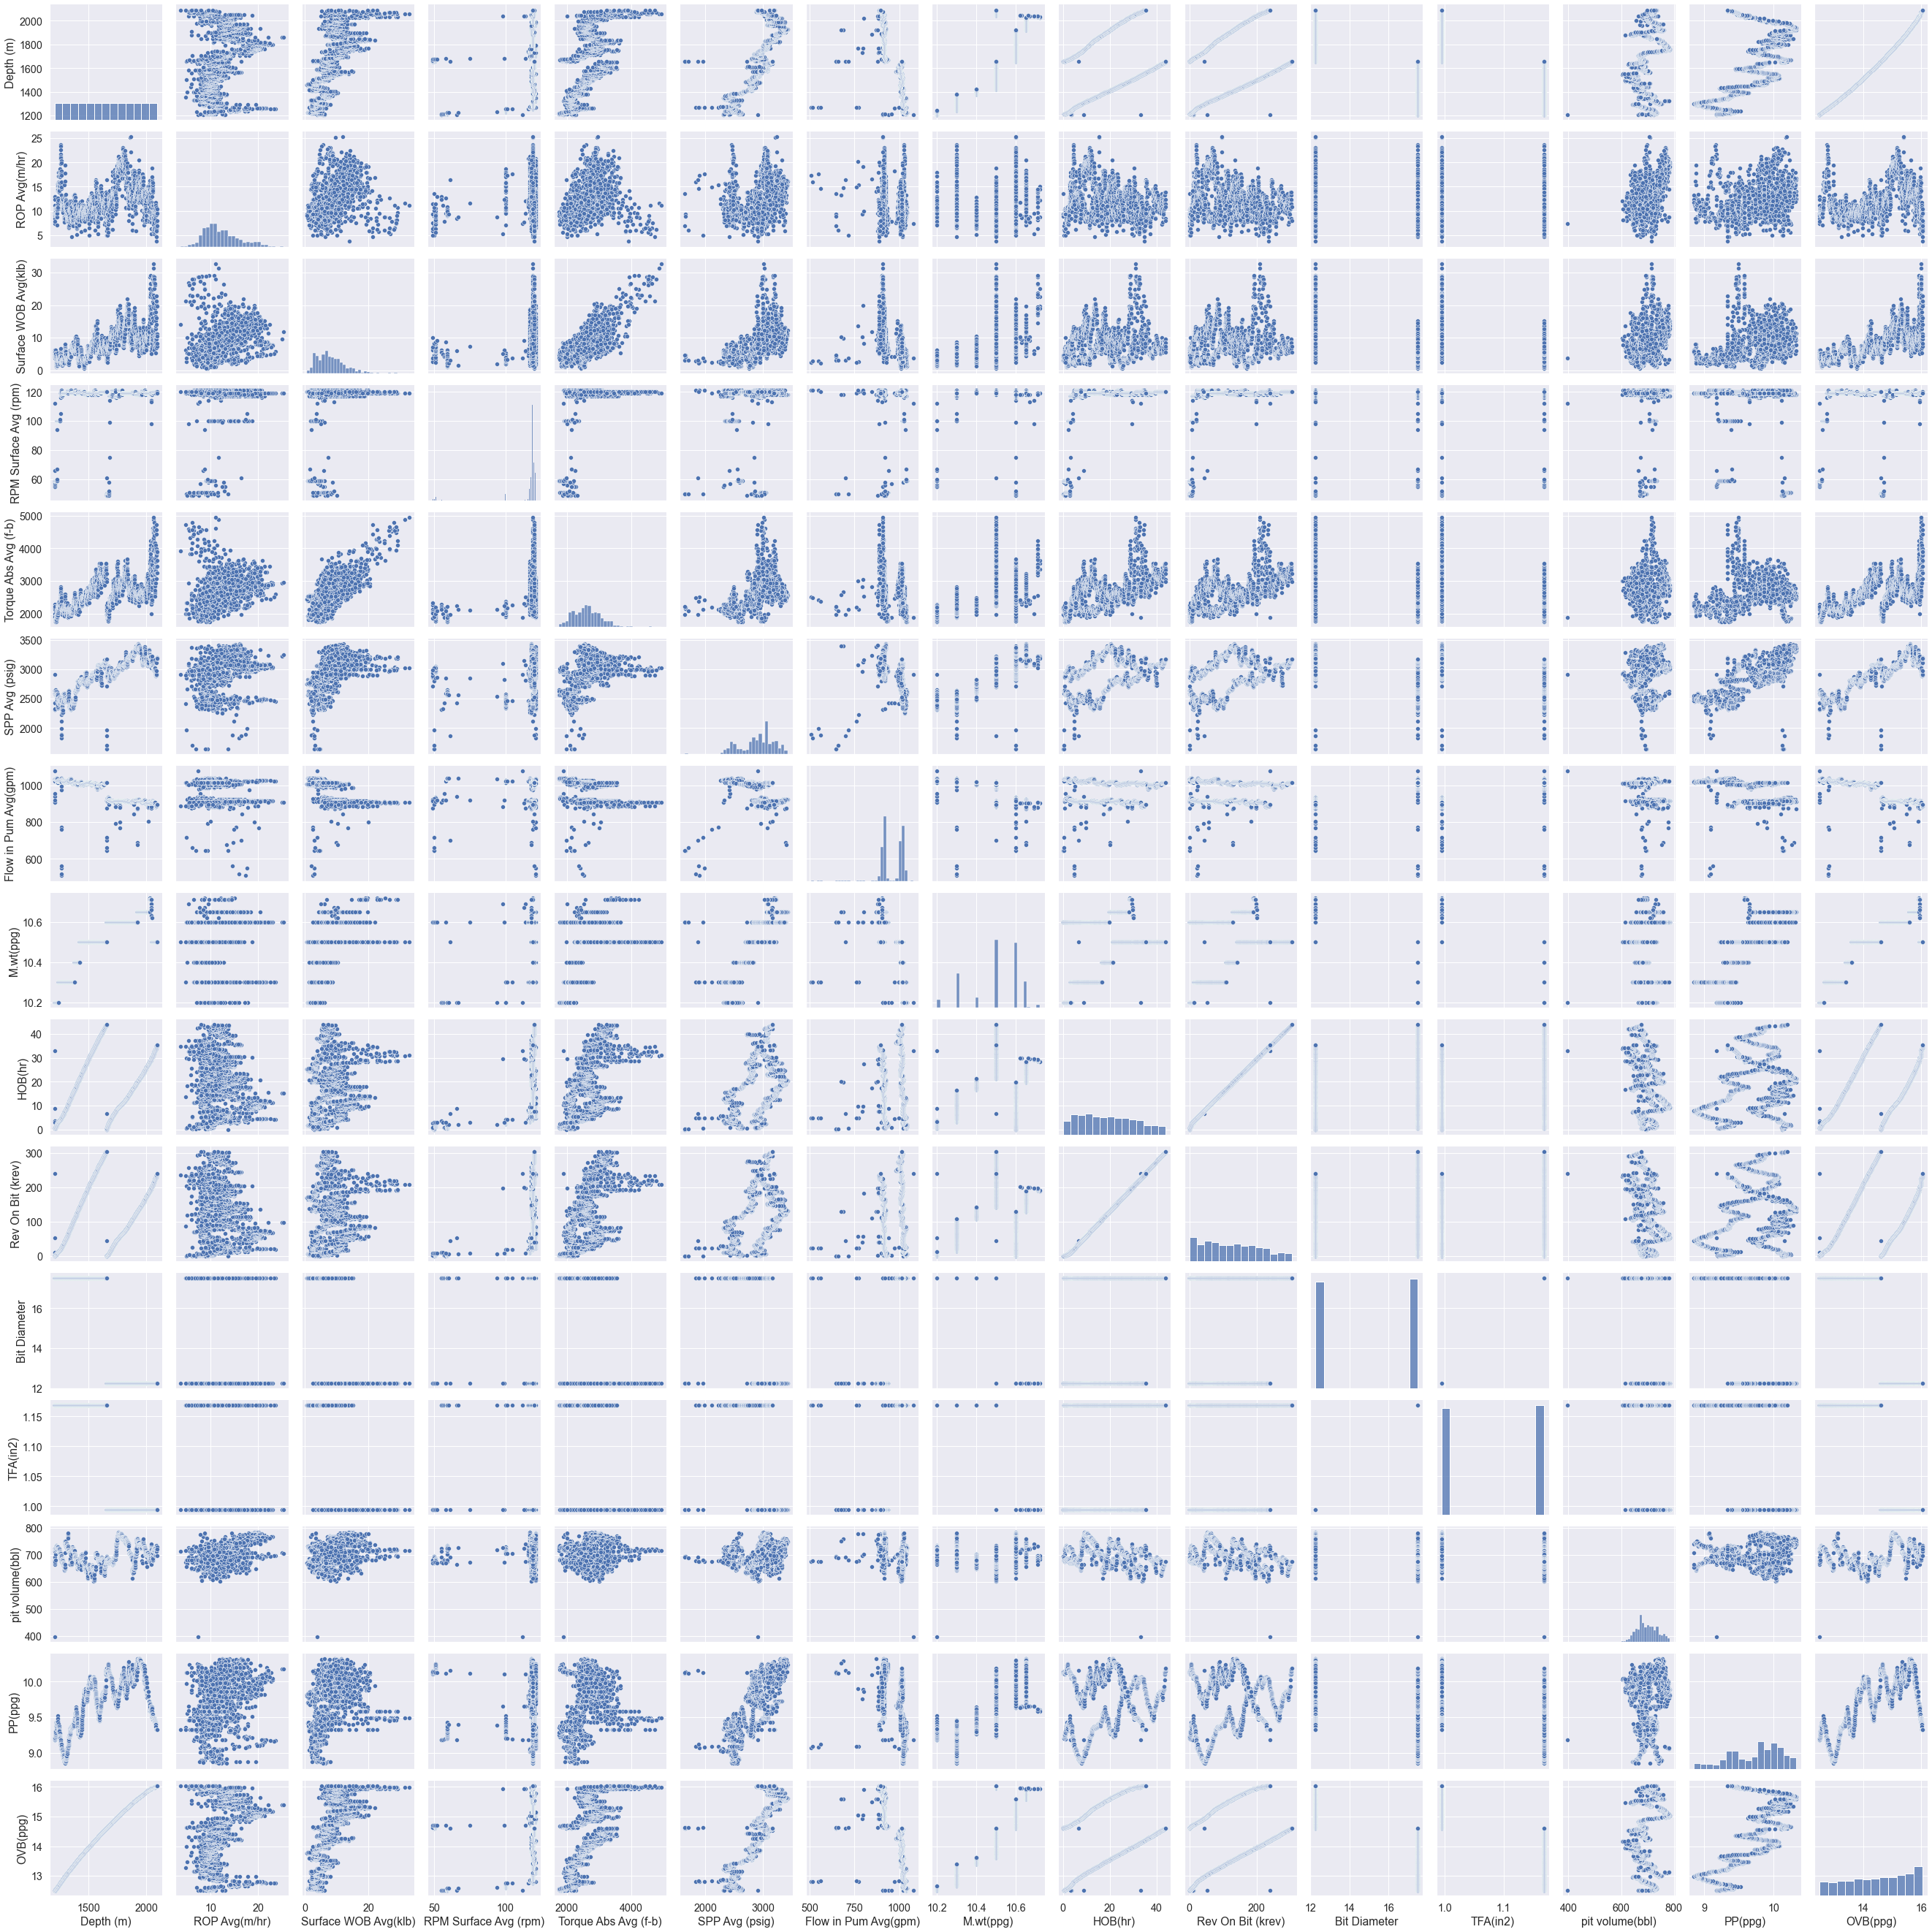

In [33]:
sns.pairplot(well_Data)

# <b>7<span style='color:#0000FF'>|</span> Split Dataset for Training and Testing </b>

In [5]:
features = well_Data.drop(columns =['ROP Avg(m/hr)'], axis = 1)
target = well_Data['ROP Avg(m/hr)']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .15, random_state = 44)

In [7]:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (1505, 14)
Shape of testing feature: (266, 14)
Shape of training label: (1505,)
Shape of training label: (266,)


# <b>8<span style='color:#0000FF'>|</span> Standrization </b>

In [8]:
Scaler = StandardScaler()
Scaler.fit(x_train)

StandardScaler()

In [9]:
x_train = Scaler.transform(x_train)
x_test = Scaler.transform(x_test)

In [10]:
x_train

array([[-0.32408617,  0.56344769,  0.26250346, ...,  0.0391406 ,
         0.10308532, -0.24621527],
       [ 1.10446451, -0.6725694 ,  0.26250346, ...,  1.15722216,
         1.41388435,  1.09614581],
       [-1.41157769, -0.85493258,  0.26250346, ..., -1.01577696,
        -2.24255504, -1.50228172],
       ...,
       [ 0.60749258,  0.88764889,  0.26250346, ...,  1.7084002 ,
         0.62740494,  0.66467261],
       [-0.25782325, -0.85493258,  0.19475047, ..., -0.39750354,
        -0.43503217, -0.16950892],
       [ 1.08692432,  0.25950906,  0.19475047, ...,  1.2678247 ,
         1.52426743,  1.08176337]])

# <b>9 <span style='color:#0000FF'>|</span> Modeling </b>

In [11]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [14]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'MSE Score: {np.sqrt(mean_squared_error(y_test, y_pred))}')  
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {r2_score(y_test, y_pred)}')
    print('-'*30)

Using model: LR
MSE Score: 2.2411270535430123
Training Accuracy: 0.5133971809245501
Testing Accuracy: 0.6289225018050664
------------------------------
Using model: KNNR
MSE Score: 1.3090701515404495
Training Accuracy: 0.9125512710848688
Testing Accuracy: 0.8733930622538046
------------------------------
Using model: SVR
MSE Score: 1.7123652322018317
Training Accuracy: 0.7854781983654365
Testing Accuracy: 0.7833670736826458
------------------------------
Using model: DT
MSE Score: 1.51686013252842
Training Accuracy: 1.0
Testing Accuracy: 0.8300102490884769
------------------------------
Using model: RF
MSE Score: 1.1285863354397632
Training Accuracy: 0.9859727412774068
Testing Accuracy: 0.9058974832011889
------------------------------
Using model: XGBR
MSE Score: 1.140604176106145
Training Accuracy: 0.9963915712839957
Testing Accuracy: 0.9038826965523581
------------------------------


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>The best models' results is <b>XGboost<b></b>
    <br></p>
    

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b>  XGboost  </b></p>
</div>. 

In [12]:
model = XGBRegressor()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

## accurcy 
print(f'Training Accuracy: {model.score(x_train, y_train)}')
print(f'Testing Accuracy: {r2_score(y_test, y_pred)}')

Training Accuracy: 0.9963915712839957
Testing Accuracy: 0.9038826965523581


In [13]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

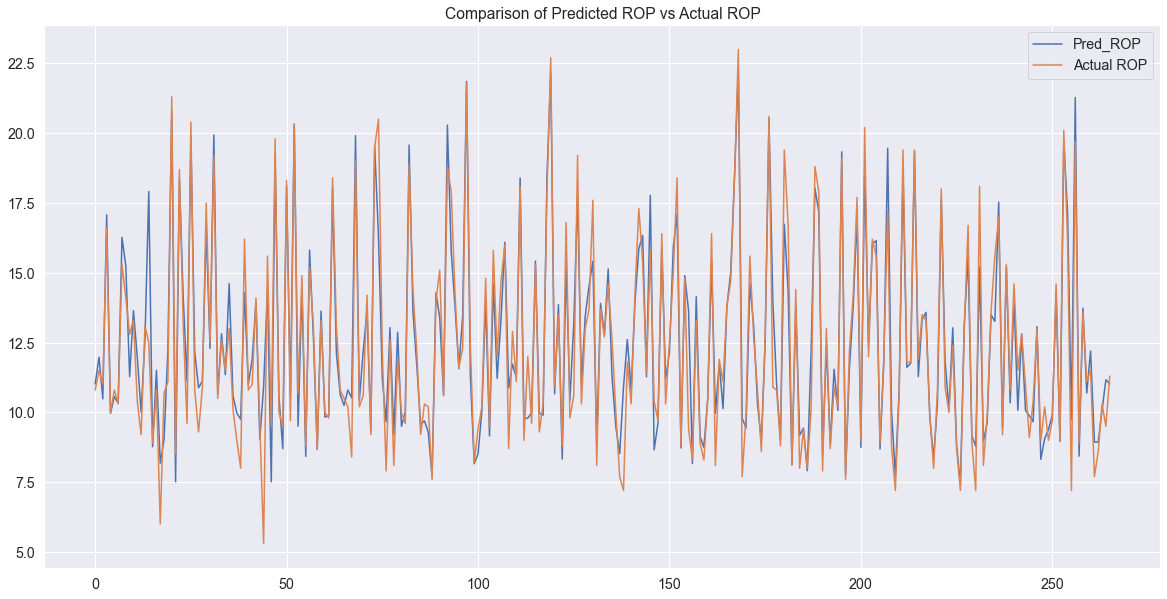

In [44]:
plt.figure(figsize=(20, 10))
plt.plot(range(266),y_pred, label = "Pred_ROP")
plt.plot(range(266),y_test, label = "Actual ROP")
plt.title('Comparison of Predicted ROP vs Actual ROP')
plt.legend()
plt.show()

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b>  Cross - Validation  </b></p>
</div>. 

In [45]:
c_val = cross_validate(model, x_train, y_train, cv = 20, scoring = 'r2')

In [46]:
c_val

{'fit_time': array([0.53986263, 0.55537105, 0.48632479, 0.52935338, 0.4823215 ,
        0.52284837, 0.5578723 , 0.76151037, 0.65593791, 0.5843904 ,
        0.57338285, 0.51534414, 0.44229484, 0.58689141, 0.58689094,
        0.67945457, 0.70497251, 0.62641764, 0.6974659 , 0.5588727 ]),
 'score_time': array([0.00650454, 0.00650573, 0.00500274, 0.00500274, 0.00700521,
        0.00700521, 0.0065043 , 0.00650215, 0.00700498, 0.00600457,
        0.00550508, 0.00600457, 0.0065062 , 0.00550413, 0.0060041 ,
        0.00650382, 0.01601291, 0.00800586, 0.00500274, 0.0060041 ]),
 'test_score': array([0.80945744, 0.88830359, 0.84549576, 0.90617898, 0.89618309,
        0.91402021, 0.90500617, 0.89238381, 0.91964255, 0.92212051,
        0.87289938, 0.9261689 , 0.93491562, 0.90030003, 0.93991255,
        0.89428865, 0.91956398, 0.84393596, 0.86978914, 0.83807723])}

In [47]:
c_val['test_score'].mean()

0.8919321781731215

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b>  Hyperparameters tuning  </b></p>
</div>. 

In [48]:
from sklearn.model_selection import cross_validate, GridSearchCV

model = XGBRegressor(objective='count:poisson')

param = {'n_estimators' : [500, 700, 1000], 'learning_rate' : [0.1,0.2,0.3],'max_depth' : [5,6,7,8]}

grid_search = GridSearchCV(estimator = model, param_grid=param, cv = 5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='count:poisson', predictor=None,
                                    random_state=None, reg_alpha=None,
                    

In [49]:
grid_search.predict(x_test)
print(f'Training Accuracy: {grid_search.score(x_train, y_train)}')
print(f'Testing Accuracy: {r2_score(y_test, y_pred)}')

Training Accuracy: 0.9999918504959675
Testing Accuracy: 0.9038826965523581


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> Deep Neutral Network </b></p>
</div>. 

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import tensorflow as tf

In [97]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(14, activation = 'relu', input_dim = x_train.shape[1]))

# Adding the second hidden layer
#model.add(Dense(units =8, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1, activation = 'linear'))

In [98]:
# Compiling the model
model.compile(loss='mean_squared_error',
              optimizer='adam',
             metrics=['acc'])

In [99]:
# Fitting the ANN to the Training set
model.fit(x_train, y_train , epochs = 10,batch_size=20, verbose=1)

Epoch 1/10
76/76 [==============================] - 4s 3ms/step - loss: 161.4574 - acc: 0.0000e+00
Epoch 2/10
76/76 [==============================] - 0s 3ms/step - loss: 129.6087 - acc: 0.0000e+00
Epoch 3/10
76/76 [==============================] - 0s 2ms/step - loss: 91.4794 - acc: 0.0000e+00
Epoch 4/10
76/76 [==============================] - 0s 4ms/step - loss: 55.8428 - acc: 0.0000e+00
Epoch 5/10
76/76 [==============================] - 0s 3ms/step - loss: 31.1808 - acc: 0.0000e+00
Epoch 6/10
76/76 [==============================] - 0s 3ms/step - loss: 18.3120 - acc: 0.0000e+00
Epoch 7/10
76/76 [==============================] - 0s 2ms/step - loss: 12.8969 - acc: 0.0000e+00
Epoch 8/10
76/76 [==============================] - 0s 3ms/step - loss: 10.6383 - acc: 0.0000e+00
Epoch 9/10
76/76 [==============================] - 0s 2ms/step - loss: 9.6005 - acc: 0.0000e+00
Epoch 10/10
76/76 [==============================] - 0s 3ms/step - loss: 9.0610 - acc: 0.0000e+00


In [100]:
print("Weights and biases of the layers after training the model with new weights and biases: \n")
for layer in model.layers:
  print(layer.name)
  print("Weights")
  print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
  print("Bias")
  print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')

Weights and biases of the layers after training the model with new weights and biases: 

dense_2
Weights
Shape:  (14, 14) 
 [[ 0.3403733  -0.6502131   0.6419093  -0.04773254  0.16565432 -0.01257817
   0.7703347  -0.35143915 -0.9479925   0.62122333 -0.75064397 -0.13310713
  -0.00177356 -0.22760676]
 [ 0.10697251 -0.19095169  0.5038671  -0.01049529  0.32930964 -0.07590427
   0.22049928 -0.26456204 -0.57888633  0.82027626 -0.819083   -0.40884492
  -0.05281037 -0.11275809]
 [ 0.23927459 -0.32886845  0.16682594 -0.26964512  0.06339128  0.01424696
   0.03480428  0.01381638  0.78652865  0.93025833 -0.21182705 -0.4320353
   0.00785043 -0.23818442]
 [ 0.1039371  -0.06567141 -0.05357875 -0.19416344  0.09130903 -0.00386639
   0.60387826  0.23216335  0.7283516   0.16076198  0.06862701 -0.29951203
  -0.24587962  0.02848089]
 [-0.15879369  0.15671091  0.07151162 -0.31264722  0.35645467 -0.42484206
   0.8354327  -0.08783071 -0.4809688   0.57617736 -0.35795003 -0.37268642
  -0.22025703  0.32577527]
 [

# <b>10 <span style='color:#0000FF'>|</span> Deployment </b>

In [14]:
# save the model
joblib.dump(model, 'model.h5') 

['model.h5']

In [15]:
# save the scaler
joblib.dump(Scaler, 'scaler.h5') 

['scaler.h5']

# <b>11 <span style='color:#0000FF'>|</span> Testing Model </b>

In [57]:
well_Data.columns

Index(['Depth (m)', 'ROP Avg(m/hr)', 'Surface WOB Avg(klb)',
       'RPM Surface Avg (rpm)', 'Torque Abs Avg (f-b)', 'SPP Avg (psig)',
       'Flow in Pum Avg(gpm)', 'M.wt(ppg)', 'HOB(hr)', 'Rev On Bit (krev)',
       'Bit Diameter', 'TFA(in2)', 'pit volume(bbl)', 'PP(ppg)', 'OVB(ppg)'],
      dtype='object')

In [58]:
well_Data.head()

Depth (m)  ROP Avg(m/hr)  Surface WOB Avg(klb)  RPM Surface Avg (rpm)  \
0     1207.0            7.4                   3.8                    112   
1     1207.5            8.4                   6.0                     66   
2     1208.0           12.7                   6.2                     55   
3     1208.5           12.9                   5.6                     55   
4     1209.0           13.0                   5.6                     55   

   Torque Abs Avg (f-b)  SPP Avg (psig)  Flow in Pum Avg(gpm)  M.wt(ppg)  \
0                1890.4            2914                  1079       10.2   
1                2251.9            2422                   940       10.2   
2                2287.5            2312                   909       10.2   
3                2228.6            2310                   909       10.2   
4                2172.0            2309                   909       10.2   

     HOB(hr)  Rev On Bit (krev)  Bit Diameter  TFA(in2)  pit volume(bbl)  \
0  33.050000              240.2          17.5    1.1688           396.82   
1   8.900000               53.3          17.5    1.1688           665.03   
2   3.550000               11.7          17.5    1.1688           723.56   
3   3.583333               11.8          17.5    1.1688           712.45   
4   3.616667               12.0          17.5    1.1688           692.46   

   PP(ppg)  OVB(ppg)  
0     9.18     12.51  
1     9.18     12.51  
2     9.18     12.51  
3     9.18     12.51  
4     9.18     12.51

In [59]:
def process_data(data):   
    Depth=data['Depth (m)']
    Surface_WOB_Avg=data['Surface WOB Avg(klb)']
    RPM_Surface_Avg=data['RPM Surface Avg (rpm)']
    Torque=data['Torque Abs Avg (f-b)']
    SPP_Avg=data['SPP Avg (psig)']
    Flow_Pum_Avg=data['Flow in Pum Avg(gpm)']
    Mud_wt=data['M.wt(ppg)']
    HOB=data['HOB(hr)']
    Rev_On_Bit=data['Rev On Bit (krev)']
    Bit_Diameter=data['Bit Diameter']
    TFA=data['TFA(in2)']
    pit_volume=data['pit volume(bbl)']
    PP=data['PP(ppg)']
    OVB=data['OVB(ppg)']
    
    final_data = [Depth,Surface_WOB_Avg,RPM_Surface_Avg,Torque,SPP_Avg ,
            Flow_Pum_Avg,Mud_wt,HOB,Rev_On_Bit,Bit_Diameter,TFA,pit_volume,PP, OVB]
    return np.array(final_data)

In [73]:
inputs = ['Depth (m)', 'Surface WOB Avg(klb)','RPM Surface Avg (rpm)', 'Torque Abs Avg (f-b)', 'SPP Avg (psig)',
       'Flow in Pum Avg(gpm)', 'M.wt(ppg)', 'HOB(hr)', 'Rev On Bit (krev)',
       'Bit Diameter', 'TFA(in2)', 'pit volume(bbl)', 'PP(ppg)', 'OVB(ppg)']
data = {key : None for key in inputs}

for key in data.keys() :
    print(key)
    value = input(f'enter the {key}')
    data[key] = value

Depth (m)
enter the Depth (m)1208
Surface WOB Avg(klb)
enter the Surface WOB Avg(klb)3.8
RPM Surface Avg (rpm)
enter the RPM Surface Avg (rpm)112
Torque Abs Avg (f-b)
enter the Torque Abs Avg (f-b)1890
SPP Avg (psig)
enter the SPP Avg (psig)2914
Flow in Pum Avg(gpm)
enter the Flow in Pum Avg(gpm)1079
M.wt(ppg)
enter the M.wt(ppg)10.2
HOB(hr)
enter the HOB(hr)33
Rev On Bit (krev)
enter the Rev On Bit (krev)240
Bit Diameter
enter the Bit Diameter17.5
TFA(in2)
enter the TFA(in2)1.02
pit volume(bbl)
enter the pit volume(bbl)396
PP(ppg)
enter the PP(ppg)9.5
OVB(ppg)
enter the OVB(ppg)12.5


In [74]:
data

{'Depth (m)': '1208',
 'Surface WOB Avg(klb)': '3.8',
 'RPM Surface Avg (rpm)': '112',
 'Torque Abs Avg (f-b)': '1890',
 'SPP Avg (psig)': '2914',
 'Flow in Pum Avg(gpm)': '1079',
 'M.wt(ppg)': '10.2',
 'HOB(hr)': '33',
 'Rev On Bit (krev)': '240',
 'Bit Diameter': '17.5',
 'TFA(in2)': '1.02',
 'pit volume(bbl)': '396',
 'PP(ppg)': '9.5',
 'OVB(ppg)': '12.5'}

In [75]:
final_data = process_data(data)
print(final_data)

['1208' '3.8' '112' '1890' '2914' '1079' '10.2' '33' '240' '17.5' '1.02'
 '396' '9.5' '12.5']


In [76]:
Scaler.transform([final_data])

array([[-1.7214543 , -0.93598288, -0.2117675 , -1.57948338,  0.01983782,
         2.00702374, -2.35597121,  1.17348908,  1.35583362,  0.9887674 ,
        -0.71385839, -7.92895966, -0.62820256, -1.91457834]])

In [77]:
result = model.predict(Scaler.transform([final_data]))
result

1/1 [==============================] - 0s 27ms/step


array([[5.1195827]], dtype=float32)

In [78]:
result[0]

array([5.1195827], dtype=float32)

In [90]:
Inputs=features.columns

In [91]:
Inputs

Index(['Depth (m)', 'Surface WOB Avg(klb)', 'RPM Surface Avg (rpm)',
       'Torque Abs Avg (f-b)', 'SPP Avg (psig)', 'Flow in Pum Avg(gpm)',
       'M.wt(ppg)', 'HOB(hr)', 'Rev On Bit (krev)', 'Bit Diameter', 'TFA(in2)',
       'pit volume(bbl)', 'PP(ppg)', 'OVB(ppg)'],
      dtype='object')

# <b>12 <span style='color:#0000FF'>|</span> Application </b>

In [20]:
%%writefile app.py
import streamlit as st
import joblib 
import pandas as pd
import xgboost

scaler = joblib.load("models/scaler.h5")
Model = joblib.load("models/model.h5")
Inputs=['Depth (m)', 'Surface WOB Avg(klb)', 'RPM Surface Avg (rpm)',
       'Torque Abs Avg (f-b)', 'SPP Avg (psig)', 'Flow in Pum Avg(gpm)',
       'M.wt(ppg)', 'HOB(hr)', 'Rev On Bit (krev)', 'Bit Diameter', 'TFA(in2)',
       'pit volume(bbl)', 'PP(ppg)', 'OVB(ppg)']

def predict(Depth,Surface_WOB_Avg,RPM_Surface_Avg,Torque,SPP_Avg,Flow_Pum_Avg,Mud_wt,HOB,Rev_On_Bit,Bit_Diameter,TFA,pit_volume,PP, OVB):
    test_df = pd.DataFrame(columns = Inputs,index=[0])
    test_df.at[0,"Depth (m)"] = Depth
    test_df.at[0,"Surface WOB Avg(klb)"] = Surface_WOB_Avg
    test_df.at[0,"RPM Surface Avg (rpm)"] = RPM_Surface_Avg
    test_df.at[0,"Torque Abs Avg (f-b)"] = Torque
    test_df.at[0,"SPP Avg (psig)"] = SPP_Avg
    test_df.at[0,"Flow in Pum Avg(gpm)"] = Flow_Pum_Avg
    test_df.at[0,"M.wt(ppg)"] = Mud_wt
    test_df.at[0,"HOB(hr)"] = HOB
    test_df.at[0,"Rev On Bit (krev)"] = Rev_On_Bit
    test_df.at[0,"Bit Diameter"] = Bit_Diameter
    test_df.at[0,"TFA(in2)"] = TFA
    test_df.at[0,"pit volume(bbl)"] = pit_volume
    test_df.at[0,"PP(ppg)"] = PP
    test_df.at[0,"OVB(ppg)"] = OVB

    result = Model.predict(scaler.transform(test_df))[0]
    return result
    

def header(url):
     st.markdown(f'<p style="background-color:#0066cc;color:#33ff33;font-size:24px;border-radius:2%;">{url}</p>', unsafe_allow_html=True)    

# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;"> ROP ML prediction App</h1> 
    </div> 
   """
     
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True)
    # following lines create boxes in which user can enter data required to make prediction
    st.sidebar.title("Choose your Features") 
    Depth = st.sidebar.slider("Total drilling Depth", min_value=0, max_value=100000, value=0, step=1)
    Surface_WOB_Avg = st.sidebar.number_input("Surface WOB Avg(klb)")
    RPM_Surface_Avg = st.sidebar.number_input("RPM Surface Avg (rpm)")
    Torque = st.sidebar.number_input('Torque Abs Avg (f-b)')
    SPP_Avg = st.sidebar.number_input('SPP Avg (psig)')
    Flow_Pum_Avg = st.sidebar.number_input('Flow in Pum Avg(gpm)')
    Mud_wt = st.sidebar.number_input('M.wt(ppg)')
    HOB = st.sidebar.number_input('HOB(hr)')
    Rev_On_Bit = st.sidebar.number_input('Rev On Bit (krev)')
    Bit_Diameter = st.sidebar.number_input('Bit Diameter')
    TFA = st.sidebar.number_input('TFA(in2)')
    pit_volume = st.sidebar.number_input('pit volume(bbl)')
    PP = st.sidebar.number_input('PP(ppg)')
    OVB = st.sidebar.number_input('OVB(ppg)')
    result =""
          
    # when 'Predict' is clicked, make the prediction and store it 
    if st.sidebar.button("Predict"): 
        result = predict(Depth,Surface_WOB_Avg,RPM_Surface_Avg,Torque,SPP_Avg,Flow_Pum_Avg,Mud_wt,HOB,Rev_On_Bit,Bit_Diameter,TFA,pit_volume,PP, OVB)
                
        ## Print final Prediction 
        st.markdown(f'<h1 style="color:#33ff33;font-size:40px;text-align:center;border-style: solid;border-width:5px;border-color:#fbff00;">{result}</h1>', unsafe_allow_html=True)
   
   ## show resturant image
    st.image('R.jfif')    
     
if __name__=='__main__': 
    main()


Overwriting app.py
